# **Importing Python libraries and loading the dataset**

In [2]:
#importing the python libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.integrate import odeint

In [3]:
#Loading the dataset to our working directory
covid = pd.read_excel('covid19KE.xlsx')

# Data Preparation

## Accessing more information of the dataset


In [4]:
#Let us get to know more about our dataset by accessing its information
covid.info()
covid.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              302 non-null    datetime64[ns]
 1    Sample size      302 non-null    int64         
 2    Positive cases   302 non-null    int64         
 3    Male             290 non-null    float64       
 4    Female           289 non-null    float64       
 5    Recoveries       292 non-null    float64       
 6    Deaths           281 non-null    float64       
 7   Nairobi           284 non-null    float64       
 8   Mombasa           262 non-null    float64       
 9   Vihiga            60 non-null     float64       
 10  Kiambu            227 non-null    float64       
 11  Kisii             115 non-null    float64       
 12  Bungoma           88 non-null     float64       
 13  Nyamira           62 non-null     float64       
 14  Kakamega          110 non-

Index(['Date', ' Sample size ', ' Positive cases ', ' Male ', ' Female ',
       ' Recoveries ', ' Deaths ', 'Nairobi', 'Mombasa', 'Vihiga', 'Kiambu',
       'Kisii', 'Bungoma', 'Nyamira', 'Kakamega', 'Kisumu', 'Busia',
       'Kirinyaga', 'Murang'a', 'Bomet', 'Migori', 'Trans-Nzoia', 'Siaya',
       'Uasin Gishu', 'Kericho', 'Homa Bay', 'Nyeri', 'Nandi', 'Nakuru',
       'Machakos', 'Embu', 'Meru', 'Nyandarua', 'Tharaka-Nithi',
       'Elgeyo-Marakwet', 'Makueni', 'Kilifi', 'Kwale', 'West Pokot', 'Narok',
       'Baringo', 'Laikipia', 'Kajiado', 'Kitui', 'Mandera', 'Lamu',
       'Taitaâ€“Taveta', 'Garissa', 'Samburu', 'Wajir', 'Turkana', 'Isiolo',
       'Tana River', 'Marsabit'],
      dtype='object')

### (i) Accuracy

In [5]:
# Ensuring the sum of positive cases add up to sample size:

covid[' Positive cases '] = covid[' Male '] + covid[' Female ']

covid['Deaths'] = covid[' Deaths '].replace('-', 0)

### (ii) Missing data/ Completeness

In [6]:
#We will now check how many missing values we have in each column
covid.isnull().sum()

Date                  0
 Sample size          0
 Positive cases      13
 Male                12
 Female              13
 Recoveries          10
 Deaths              21
Nairobi              18
Mombasa              40
Vihiga              242
Kiambu               75
Kisii               187
Bungoma             214
Nyamira             240
Kakamega            192
Kisumu              131
Busia               115
Kirinyaga           225
Murang'a            160
Bomet               234
Migori              208
Trans-Nzoia         211
Siaya               207
Uasin Gishu         118
Kericho             194
Homa Bay            227
Nyeri               179
Nandi               214
Nakuru              109
Machakos            101
Embu                197
Meru                163
Nyandarua           228
Tharaka-Nithi       244
Elgeyo-Marakwet     259
Makueni             197
Kilifi              131
Kwale               201
West Pokot          270
Narok               207
Baringo             257
Laikipia        

In [7]:
# Dropping rows with entire missing values
covid.shape

(302, 55)

In [8]:
covid = covid[covid[' Sample size '].notna()]

In [9]:
# Replacing the missing values with zero
covid = covid.fillna(0)

In [10]:
# Veryfying that there are no missing values
covid.isnull().sum().sum()

0

In [11]:
# Checking the shape of the new dataframe
covid.shape

(302, 55)

### (iii) Duplicates / Consitency

In [12]:
#We will now identify which obseervations are duplicate
covid.duplicated().sum()

0

In [13]:
#Drop duplicate
covid = covid.drop_duplicates()

In [14]:
covid.columns = covid.columns.str.strip().str.replace(' ','_')
covid.columns

Index(['Date', 'Sample_size', 'Positive_cases', 'Male', 'Female', 'Recoveries',
       'Deaths', 'Nairobi', 'Mombasa', 'Vihiga', 'Kiambu', 'Kisii', 'Bungoma',
       'Nyamira', 'Kakamega', 'Kisumu', 'Busia', 'Kirinyaga', 'Murang'a',
       'Bomet', 'Migori', 'Trans-Nzoia', 'Siaya', 'Uasin_Gishu', 'Kericho',
       'Homa_Bay', 'Nyeri', 'Nandi', 'Nakuru', 'Machakos', 'Embu', 'Meru',
       'Nyandarua', 'Tharaka-Nithi', 'Elgeyo-Marakwet', 'Makueni', 'Kilifi',
       'Kwale', 'West_Pokot', 'Narok', 'Baringo', 'Laikipia', 'Kajiado',
       'Kitui', 'Mandera', 'Lamu', 'Taitaâ€“Taveta', 'Garissa', 'Samburu',
       'Wajir', 'Turkana', 'Isiolo', 'Tana_River', 'Marsabit', 'Deaths'],
      dtype='object')

##### Converting the columns name to lowercase

In [15]:
covid.columns=map(str.lower,covid.columns)
covid.columns

Index(['date', 'sample_size', 'positive_cases', 'male', 'female', 'recoveries',
       'deaths', 'nairobi', 'mombasa', 'vihiga', 'kiambu', 'kisii', 'bungoma',
       'nyamira', 'kakamega', 'kisumu', 'busia', 'kirinyaga', 'murang'a',
       'bomet', 'migori', 'trans-nzoia', 'siaya', 'uasin_gishu', 'kericho',
       'homa_bay', 'nyeri', 'nandi', 'nakuru', 'machakos', 'embu', 'meru',
       'nyandarua', 'tharaka-nithi', 'elgeyo-marakwet', 'makueni', 'kilifi',
       'kwale', 'west_pokot', 'narok', 'baringo', 'laikipia', 'kajiado',
       'kitui', 'mandera', 'lamu', 'taitaâ€“taveta', 'garissa', 'samburu',
       'wajir', 'turkana', 'isiolo', 'tana_river', 'marsabit', 'deaths'],
      dtype='object')

#####  Extracting months and years from the respective dates.

In [16]:
months = {3 : 'March', 4: 'April', 5 : 'May', 6: 'June', 7 : 'July', 8: 'August', 9: 'September',
      10: 'October', 11 : 'November', 12: 'December', 1: 'January', 2: 'February'} 

covid['month'] = pd.to_datetime(covid['date']).dt.month.map(months)

covid['year'] = pd.to_datetime(covid['date']).dt.year.map({2020 : 2020, 2021: 2021})

In [17]:
# Ensuring all data in the deaths column is a number and converting from string to float values

covid['deaths'] = covid['deaths'].replace('-', 0).astype(float)

covid['deaths'].dtypes

deaths    float64
deaths    float64
dtype: object

## Exporting the cleaned CSV file.

In [18]:
# Converting the cleaned dataset to a csv file
covid.to_csv('covid.csv')

## **ANALYSIS**

### **2.DATA VISUALIZATION**

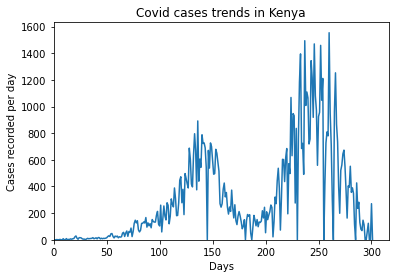

In [19]:
#Trend lines showing covid cases reported in kenya from March 2020 to Feb 2021

fig = plt.figure()
covid=pd.read_csv('covid.csv')
plt.plot(covid['positive_cases'])
plt.xlabel('Days')
plt.ylabel('Cases recorded per day')
plt.title('Covid cases trends in Kenya')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
fig.savefig('COVID trend in Kenya.png')

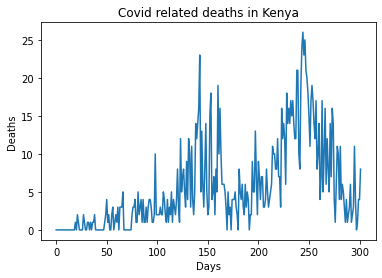

In [20]:
#Trend line for covid related deaths in kenya
fig = plt.figure()
plt.plot(covid['deaths'])
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.title('Covid related deaths in Kenya')

fig.savefig('covid deaths in Kenya.png')

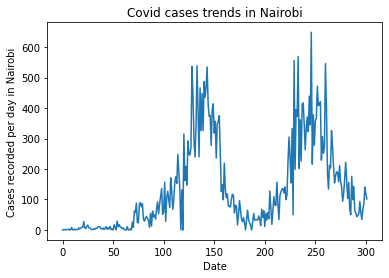

In [21]:
fig = plt.figure()
plt.plot(covid['nairobi'])
plt.ylabel('Cases recorded per day in Nairobi')
plt.xlabel('Date')
plt.title('Covid cases trends in Nairobi')

fig.savefig('positive trend in Nairobi.png')

##### Plot of Nairobi, Machakos and Kiambu cases over time.

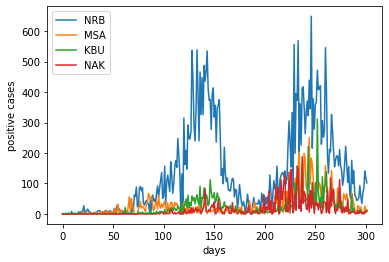

In [22]:
fig = plt.figure()
plt.plot(covid['nairobi'])
plt.plot(covid['mombasa'])
plt.plot(covid['kiambu'])
plt.plot(covid['nakuru'])
plt.xlabel('days')
plt.ylabel('positive cases')

plt.legend(['NRB', 'MSA', 'KBU','NAK'])
fig.savefig('Nairobi, Mombasa, Kiambu and Nakuru cases over time.png')

### Ratio of male to female infections

In [55]:
m2f = covid['male'].sum() / covid['female'].sum()
m2f


# result shows that for every male infected, 2 females tested positive.

1.7376784350584504

### Recovery to death ratio

In [24]:
r2d = covid['recoveries'].sum() / covid['deaths'].sum()
r2d


# result shows that for every 47 recoveries made, 1 person loses their life

47.23090481786134

### Mortality rate

In [25]:
mortality = (covid['deaths'].sum() / covid['positive_cases'].sum()) * 100
mortality


# result shows that there's an approximately 2% chance of death for every positive case.

1.8260431083502313

### Recovery chances in case of infection.

In [48]:
recover = (covid['recoveries'].sum() / covid['positive_cases'].sum()) * 100
recover
# result shows that there's an 86% chance of recover in case you contract it.

862.4566824380144

### Infection rate given a sample size

In [27]:
infected = (covid['positive_cases'].sum() / covid['sample_size'].sum()) * 1000
infected

# result shows that there's 87 positive people for every 1000 people tested.

86.64993915437127

### Data grouped by months and years.

In [28]:
pd.pivot_table(covid, values=['deaths', 'positive_cases', 'recoveries', 'male', 'female']
               ,columns=['year', 'month'], aggfunc='sum')

year             2020                                                   \
month           April   August December     July    June March     May   
deaths           16.0    237.0    201.0    193.0    84.0   1.0    47.0   
female          134.0   4784.0   4419.0   5190.0  1320.0  26.0   527.0   
male            203.0   8176.0   7509.0   9080.0  3084.0  33.0  1039.0   
positive_cases  337.0  12960.0  11928.0  14270.0  4404.0  59.0  1566.0   
recoveries      141.0  11727.0  23393.0   5963.0  1565.0   3.0   330.0   

year                                          2021  
month          November  October September January  
deaths            473.0    285.0     133.0    32.0  
female          10706.0   5391.0    1340.0   209.0  
male            16751.0  10253.0    2783.0   250.0  
positive_cases  27457.0  15644.0    4123.0   459.0  
recoveries      18381.0  12055.0    5179.0  1650.0

In [29]:
covid.groupby(['year','month'])[['positive_cases', 'male', 'female', 'deaths', 'recoveries']].sum()

positive_cases     male   female  deaths  recoveries
year month                                                          
2020 April               337.0    203.0    134.0    16.0       141.0
     August            12960.0   8176.0   4784.0   237.0     11727.0
     December          11928.0   7509.0   4419.0   201.0     23393.0
     July              14270.0   9080.0   5190.0   193.0      5963.0
     June               4404.0   3084.0   1320.0    84.0      1565.0
     March                59.0     33.0     26.0     1.0         3.0
     May                1566.0   1039.0    527.0    47.0       330.0
     November          27457.0  16751.0  10706.0   473.0     18381.0
     October           15644.0  10253.0   5391.0   285.0     12055.0
     September          4123.0   2783.0   1340.0   133.0      5179.0
2021 January             459.0    250.0    209.0    32.0      1650.0

### Pivot table of important statistics

In [30]:
pd.pivot_table(covid, values=['deaths', 'positive_cases', 'recoveries', 'male', 'female']
               ,columns=['year', 'month'], aggfunc='sum')


year             2020                                                   \
month           April   August December     July    June March     May   
deaths           16.0    237.0    201.0    193.0    84.0   1.0    47.0   
female          134.0   4784.0   4419.0   5190.0  1320.0  26.0   527.0   
male            203.0   8176.0   7509.0   9080.0  3084.0  33.0  1039.0   
positive_cases  337.0  12960.0  11928.0  14270.0  4404.0  59.0  1566.0   
recoveries      141.0  11727.0  23393.0   5963.0  1565.0   3.0   330.0   

year                                          2021  
month          November  October September January  
deaths            473.0    285.0     133.0    32.0  
female          10706.0   5391.0    1340.0   209.0  
male            16751.0  10253.0    2783.0   250.0  
positive_cases  27457.0  15644.0    4123.0   459.0  
recoveries      18381.0  12055.0    5179.0  1650.0

In [31]:
# Confirming overall infection rate at the moment again

(covid['positive_cases'].sum() / covid['sample_size'].sum()) * 100


# Explanation: The positive percentage rate in Kenya stands at roughly 
# 9%

8.664993915437126

# **SIR MODEL**

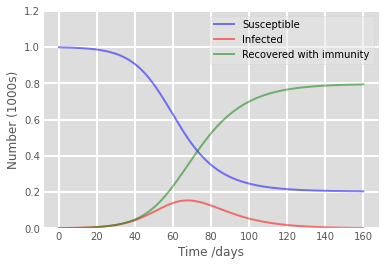

In [60]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# **SIR MODEL**

In [58]:
# The SIR model differential equations.
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in I population over time
    dIdt = beta * S * I / N - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

R0 is 2.0


<AxesSubplot:xlabel='day'>

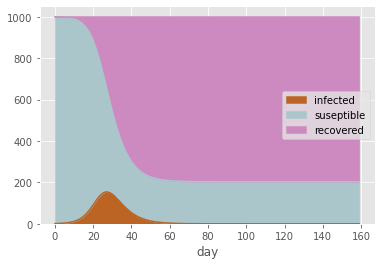

In [59]:
effective_contact_rate = 0.5
recovery_rate = 1/4

print("R0 is", effective_contact_rate / recovery_rate)

# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 1000
recovered = 0
infected = 1
susceptible = total_pop - infected - recovered

# A list of days, 0-160
days = range(0, 160)

# Use differential equations with our population
ret = odeint(deriv,
             [susceptible, infected, recovered],
             days,
             args=(total_pop, effective_contact_rate, recovery_rate))
S, I, R = ret.T

# Build a dataframe
df = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'recovered': R,
    'day': days
})

plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'suseptible', 'recovered'],
        color=['#bb6424', '#aac6ca', '#cc8ac0'],
        kind='area',
        stacked=True)